### BEHIND THE SCENE - DOCTOR WHO

##### I. Load packages and files

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dw_imbd = pd.read_csv("dw_imbd.csv")
dw_script = pd.read_csv("dw_scripts.csv")

In [4]:
dw_imbd.head()

,number,title,rating,nbr_votes,description,season
0,1,Rose,7.6,6504,When ordinary shop-worker Rose Tyler meets a m...,1
1,2,The End of the World,7.6,5684,The Doctor takes Rose to the year 5 billion to...,1
2,3,The Unquiet Dead,7.6,5326,The Doctor has great expectations for his late...,1
3,4,Aliens of London,7.0,5116,The Doctor returns Rose to her own time - well...,1
4,5,World War Three,7.1,4943,The Slitheen have infiltrated Parliament and h...,1


In [5]:
dw_script.head()

,idx,text,type,details,episodeid,doctorid
0,0,Sylvest home,location,NaN,21-7,6
1,1,Twin boys are playing a cross between chess an...,context,NaN,21-7,6
2,2,Where's mother?,talk,REMUS,21-7,6
3,3,She's busy.,talk,SYLVEST,21-7,6
4,4,Does that mean she isn't talking to us?,talk,ROMULUS,21-7,6


##### 2. Compare IMBD ratings across different seasons

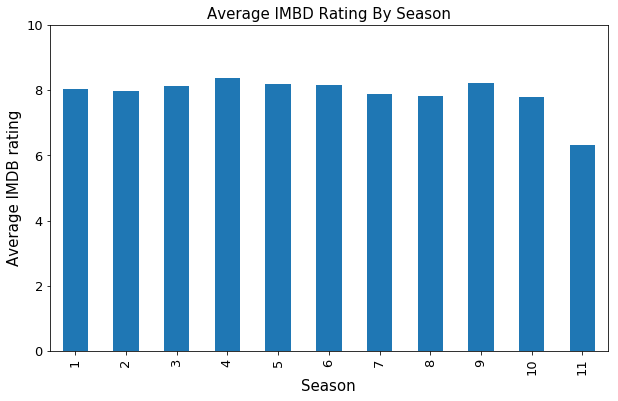

In [6]:
fig,ax=plt.subplots(figsize=[10,6])

dw_imbd.groupby(["season"]).mean()["rating"].plot("bar")

plt.title("Average IMBD Rating By Season",fontsize = 15)
plt.xlabel("Season", fontsize = 15)
plt.ylabel("Average IMDB rating", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.ylim([0,10])

plt.show()

###### In general, during the 9th and 10th doctor, Doctor Who receives higher IMDB ratings. The season with the lowest rating is the 11th season,  which is when the new female doctor comes along. It seems that the fans are not satisfied the new stories and the new doctor. 

##### 3. Characters

##### Let's take a look at the new doctor series (post 8th).

In [7]:
new_dw = dw_script[dw_script["doctorid"]>8]
character_line = new_dw["details"].value_counts()[:15]

In [8]:
character_line = character_line.to_frame()

In [9]:
character_line

,details
DOCTOR,17854
AMY,2314
ROSE,2130
CLARA,2077
MARTHA,1365
DONNA,1277
RORY,1268
BILL,1160
RIVER,840
RYAN,587


In [10]:
top = list(character_line.index)

###### It's not a surprise that Doctor has the most script line, almost eight times more than the next character. And among Doctor's companions, Amy has the next highest line count, followed by Rose, and Clara, which are all very similar in counts. 

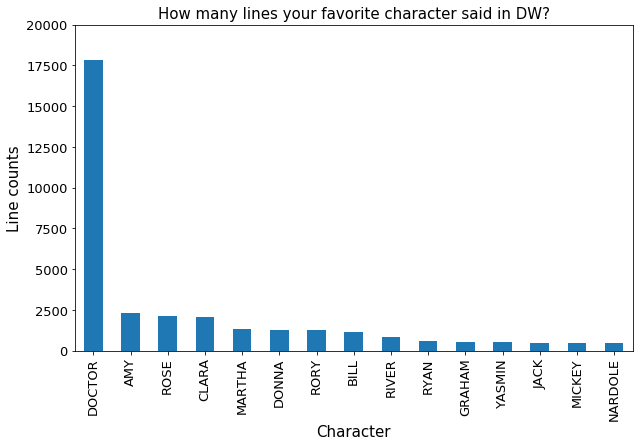

In [11]:
fig,ax=plt.subplots(figsize=[10,6])
character_line["details"].plot("bar")

plt.title("How many lines your favorite character said in DW?",fontsize = 15)
plt.xlabel("Character", fontsize = 15)
plt.ylabel("Line counts", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.ylim([0,20000])
plt.show()

##### 4. Story Stages

In [12]:
dw_loc = dw_script[dw_script.type=='location']

In [13]:
dw_loc = dw_loc.text.value_counts()[:15]
dw_loc_df = dw_loc.to_frame()

In [14]:
dw_loc_df

,text
Tardis,1301
Corridor,540
Control room,507
Spaceship,259
Tunnel,201
Bridge,199
Laboratory,181
Throne room,150
Street,138
Outside the Tardis,112


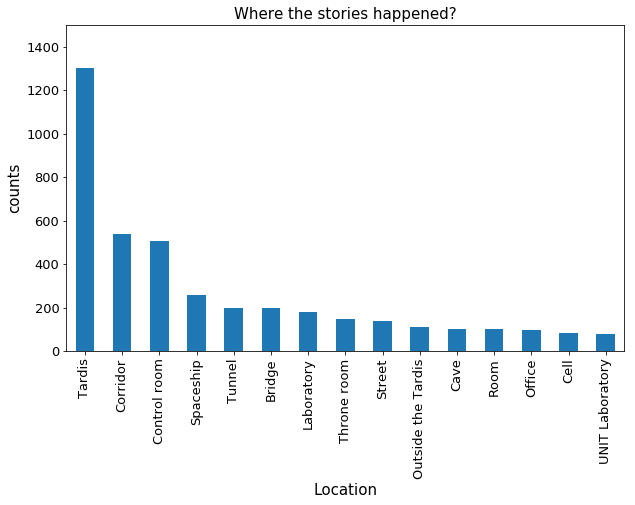

In [15]:
fig,ax=plt.subplots(figsize=[10,6])
dw_loc_df["text"].plot("bar")

plt.title("Where the stories happened?",fontsize = 15)
plt.xlabel("Location", fontsize = 15)
plt.ylabel("counts", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.ylim([0,1500])
plt.show()

###### No surprises most conversations happen in TARDIS! It kind of surprised me to find out Corridor is the second most frequent location in DW. The Control room and Spaceship are also popular locations as a lot of the stories are about SPACE. 

##### 5. Word Cloud for Conversations

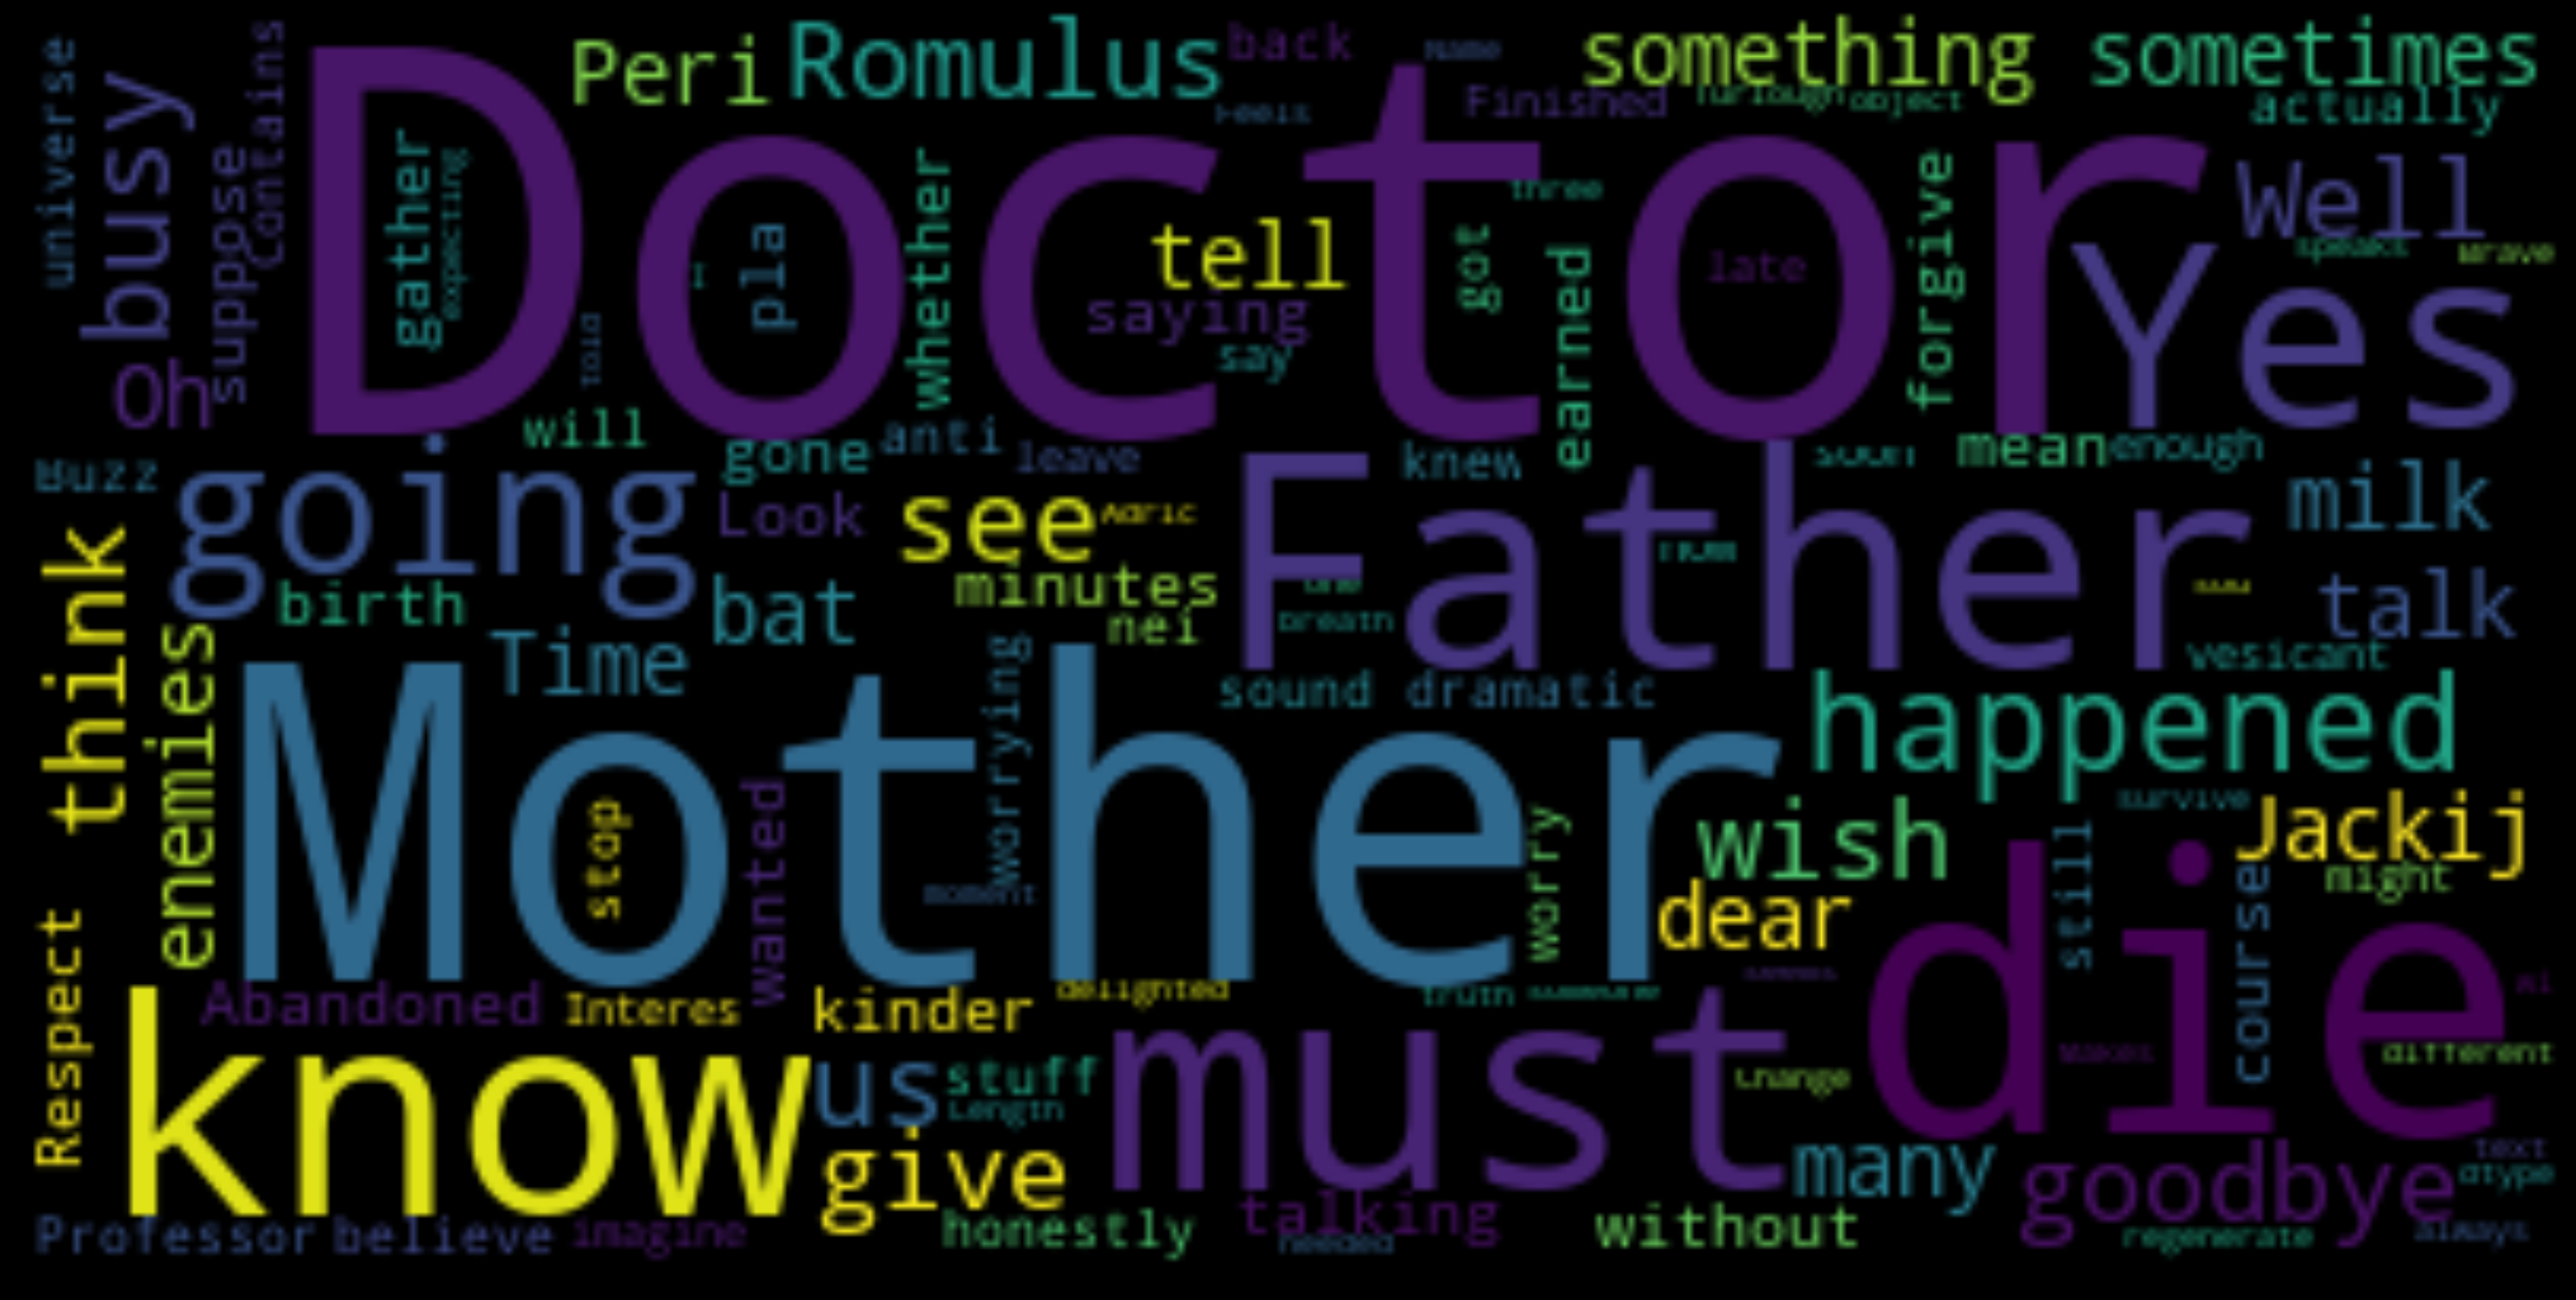

In [16]:
from wordcloud import WordCloud, STOPWORDS
text = dw_script[dw_script['type']=='talk'].text
wordcloud = WordCloud(
#     width = 8000,
#     height = 6000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##### 6. Sentiment Analysis for Characters

In [18]:
df = dw_script[dw_script['type']=='talk']

In [19]:
df.shape

(245632, 6)

In [20]:
is_str = (df.text.apply(lambda Text: isinstance(Text, str))) == True

In [21]:
txt_df = df[is_str]

In [22]:
txt_df.shape

(245618, 6)

In [27]:
from textblob import TextBlob
df[['polarity', 'subjectivity']] = txt_df.text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [25]:
# df.iloc[:, 1].tolist()
# top
# df_
# sent_pos
# d

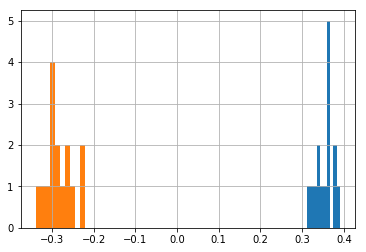

In [46]:
sp = []
sn = []
for char in top:   
    df_ = df[np.where(df.details==char, True, False)]
    sent_pos, sent_neg = [], []
    for i in range(df_.shape[0]):
        if df_.polarity.iloc[i] > 0:
            sent_pos.append(df_.polarity.iloc[i])
        elif df_.polarity.iloc[i] < 0:
            sent_neg.append(df_.polarity.iloc[i])
        else:
            pass
            
    sp.append(np.mean(sent_pos))
    sn.append(np.mean(sent_neg))
# print(sent_pos)    
d = {'character' : top, 'pos' : sp, 'neg' : sn}
sent_df = pd.DataFrame.from_dict(d)


sent_df.pos.hist()
sent_df.neg.hist()
plt.show()

In [53]:
# sent_df
#sent_df.iloc[:-1,:]

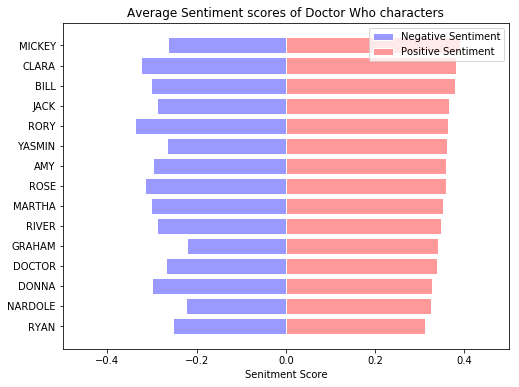

In [54]:
#sent_df_old = sent_df.copy()
sent_df = sent_df.sort_values('pos', ascending=True)
#sent_df = sent_df.iloc[:-1,:]

n = len(sent_df.pos)
X = np.arange(n)

fig = plt.figure(figsize=(8,6))
plt.barh(X, sent_df.neg, facecolor='#9999ff', edgecolor='white')
plt.barh(X, sent_df.pos, facecolor='#ff9999', edgecolor='white')

font = {'size': 10}

plt.xlim([-.5,.5])
#plt.yticks(ticks=X, labels=sent_df.character, rotation='0')
plt.yticks(X, sent_df.character)
plt.xlabel('Senitment Score')
plt.title('Average Sentiment scores of Doctor Who characters')
plt.legend(('Negative Sentiment','Positive Sentiment'))
plt.show()

##### We can see from the simple illustration that Mickey is the most positive person in DW, followed by Clara and Bill. And no surprise Doctor is the fourth from the bottom postive person XD. From the negativity side, seems like Rory has the most negative sentiments in the show. Clara is an interesting character as she expresses both very positive and negative sentiments in her lines.

###### Next step:
Compare different doctors - 9/10/11/12 
Sentiment in words


In [63]:
# new_dw.groupby('doctorid')['details'].filter(lambda x: x == 'DOCTOR')
only_doc = pd.DataFrame(new_dw[new_dw['details'] == 'DOCTOR'])

In [71]:
# new_dw
doc_list = [9,10,11,12]

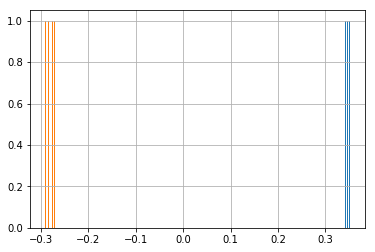

In [73]:
sp = []
sn = []
for doc_id in doc_list:   
    df_ = df[np.where(df.doctorid==doc_id, True, False)]
    sent_pos, sent_neg = [], []
    for i in range(df_.shape[0]):
        if df_.polarity.iloc[i] > 0:
            sent_pos.append(df_.polarity.iloc[i])
        elif df_.polarity.iloc[i] < 0:
            sent_neg.append(df_.polarity.iloc[i])
        else:
            pass
            
    sp.append(np.mean(sent_pos))
    sn.append(np.mean(sent_neg))
# print(sent_pos)    
d = {'character' : doc_list, 'pos' : sp, 'neg' : sn}
sent_df = pd.DataFrame.from_dict(d)


sent_df.pos.hist()
sent_df.neg.hist()
plt.show()

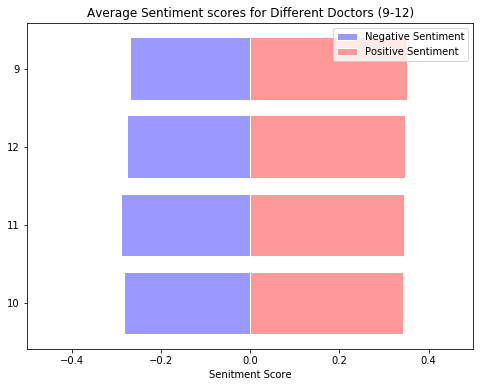

In [75]:
#sent_df_old = sent_df.copy()
sent_df = sent_df.sort_values('pos', ascending=True)
#sent_df = sent_df.iloc[:-1,:]

n = len(sent_df.pos)
X = np.arange(n)

fig = plt.figure(figsize=(8,6))
plt.barh(X, sent_df.neg, facecolor='#9999ff', edgecolor='white')
plt.barh(X, sent_df.pos, facecolor='#ff9999', edgecolor='white')

font = {'size': 10}

plt.xlim([-.5,.5])
plt.yticks(X, sent_df.character)
plt.xlabel('Senitment Score')
plt.title('Average Sentiment scores for Different Doctors (9-12)')
plt.legend(('Negative Sentiment','Positive Sentiment'))
plt.show()

#### As we can see, interestingly, the ninth doctor is the most postive among the new doctors, while the 11th is the most negative. 